In [17]:
import pandas as pd
import sklearn

In [18]:
df = pd.read_csv("/Users/Thinkport/Documents/ba/bachelorarbeit/data/Experiments.csv", sep=';')
df.reset_index(inplace=True, drop=True)

del df["UID"]
del df["average "]
del df["step"]
del df["total_energy"]
del df["status"]
del df["git repository"]
del df["Host OS"]
del df["Guest OS"]

In [19]:
columns = [i.replace(" ", "_").lower() for i in df.columns]

In [20]:
d = dict(zip(df.columns, columns))

In [21]:
def transform_time(timestr):
    ftr = [3600,60,1]
    return sum([a*b for a,b in zip(ftr, map(int,timestr.split(':')))])

In [22]:
df.rename(columns=d, inplace=True)
df

,virtualization_technology,time,energy,workflow,vcpu,memory,hint_dedicated,vcpupin,emulatorpin,iothreadpin,shares,cachetune,hotplug,enable_nesting_pages,enable_pae/nx,execution_cap,cpu_limit
0,KVM,00:35:45,"17,71191106",containers,1,4000,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0
1,VirtualBox,00:34:12,"16,07706389",containers,1,4000,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,100.0,-1.0
2,KVM,00:06:06,"2,828216667",ci,1,4096,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0
3,KVM,00:06:09,"2,845361111",ci,1,4096,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0
4,KVM,00:37:28,"18,24825694",containers,1,4096,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0
5,KVM,00:39:26,"19,34864583",containers,1,4096,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0
6,KVM,00:36:55,"17,90830833",containers,1,4096,0,0,0,0,-1,0,-1,-1.0,-1.0,-1.0,-1.0
7,VirtualBox,00:06:33,"2,784347222",ci,1,4241,0,-1,100,-1,-1,-1,-1,1.0,1.0,100.0,-1.0
8,VirtualBox,00:06:05,"2,885748611",ci,1,4241,0,-1,100,-1,-1,-1,-1,1.0,1.0,100.0,-1.0
9,KVM,00:40:38,"22,61157778",containers,1,5000,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0


In [23]:

df = df[df.energy.notna()]
df.energy = df.energy.apply(lambda x:float(x.replace(",", ".")))
df = df[~df.isnull().any(axis=1)]



df.time = df.time.apply(transform_time)

In [24]:
df

,virtualization_technology,time,energy,workflow,vcpu,memory,hint_dedicated,vcpupin,emulatorpin,iothreadpin,shares,cachetune,hotplug,enable_nesting_pages,enable_pae/nx,execution_cap,cpu_limit
0,KVM,2145,17.711911,containers,1,4000,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0
1,VirtualBox,2052,16.077064,containers,1,4000,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,100.0,-1.0
2,KVM,366,2.828217,ci,1,4096,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0
3,KVM,369,2.845361,ci,1,4096,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0
4,KVM,2248,18.248257,containers,1,4096,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0
5,KVM,2366,19.348646,containers,1,4096,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0
6,KVM,2215,17.908308,containers,1,4096,0,0,0,0,-1,0,-1,-1.0,-1.0,-1.0,-1.0
7,VirtualBox,393,2.784347,ci,1,4241,0,-1,100,-1,-1,-1,-1,1.0,1.0,100.0,-1.0
8,VirtualBox,365,2.885749,ci,1,4241,0,-1,100,-1,-1,-1,-1,1.0,1.0,100.0,-1.0
9,KVM,2438,22.611578,containers,1,5000,0,0,0,0,-1,0,0,-1.0,-1.0,-1.0,-1.0


In [25]:
values_string = []
values_numbers = []

for col in df.columns:
    print("columns:", col)
    all_values = list(df[col])
    print(all_values)
    if type(all_values[0]) == str:
        values_string.append(col)
    else:
        values_numbers.append(col)
    print(set(df[col]))
    print()

columns: virtualization_technology
['KVM', 'VirtualBox', 'KVM', 'KVM', 'KVM', 'KVM', 'KVM ', 'VirtualBox', 'VirtualBox', 'KVM', 'VirtualBox', 'KVM', 'KVM', 'KVM', 'KVM', 'KVM', 'KVM', 'KVM', 'VirtualBox', 'VirtualBox', 'VirtualBox', 'VirtualBox', 'VirtualBox', 'VirtualBox', 'VirtualBox', 'KVM', 'KVM', 'KVM', 'LXC', 'LXC', 'LXC', 'LXC', 'VirtualBox', 'VirtualBox', 'VirtualBox', 'VirtualBox', 'LXC', 'LXC', 'LXC']
{'KVM ', 'LXC', 'KVM', 'VirtualBox'}

columns: time
[2145, 2052, 366, 369, 2248, 2366, 2215, 393, 365, 2438, 1140, 1962, 2008, 2082, 2121, 2276, 2283, 2760, 365, 641, 1955, 1924, 2145, 3424, 1884, 1990, 352, 358, 1747, 1952, 1879, 1646, 1952, 2003, 2227, 960, 352, 350, 356]
{641, 2052, 1924, 2438, 393, 1952, 2082, 1955, 2215, 1962, 2227, 2366, 960, 1990, 2248, 2121, 2760, 1747, 2003, 1879, 2008, 1884, 350, 3424, 2145, 352, 2276, 356, 358, 2283, 365, 366, 1646, 369, 1140}

columns: energy
[17.71191106, 16.07706389, 2.828216667, 2.845361111, 18.24825694, 19.34864583, 17.90830833, 

In [26]:
# step - all values are similar
# execution_cap - only 2 values 


In [27]:
values_string = ['virtualization_technology']

In [28]:
values_numbers

['time',
 'energy',
 'vcpu',
 'memory',
 'hint_dedicated',
 'vcpupin',
 'emulatorpin',
 'iothreadpin',
 'shares',
 'cachetune',
 'hotplug',
 'enable_nesting_pages',
 'enable_pae/nx',
 'execution_cap',
 'cpu_limit']

In [29]:
from sklearn.preprocessing import normalize, OneHotEncoder
import numpy as np


ohe = OneHotEncoder()
data = ohe.fit_transform(df[values_string])
df1 = pd.DataFrame(data.toarray(), columns=ohe.get_feature_names_out(), dtype=int)
df2 = pd.DataFrame(df[values_numbers].T, values_numbers).T
df_all = pd.concat([df1, df2, df.workflow], axis=1)

In [30]:
df_all.columns

Index(['virtualization_technology_KVM', 'virtualization_technology_KVM ',
       'virtualization_technology_LXC', 'virtualization_technology_VirtualBox',
       'time', 'energy', 'vcpu', 'memory', 'hint_dedicated', 'vcpupin',
       'emulatorpin', 'iothreadpin', 'shares', 'cachetune', 'hotplug',
       'enable_nesting_pages', 'enable_pae/nx', 'execution_cap', 'cpu_limit',
       'workflow'],
      dtype='object')

   Technology  Average Energy
0         KVM       14.185362
1         LXC        9.125952
2  VirtualBox       18.000811


/var/folders/ns/1tbxwg412v7dvp3wyqsx8db80000gn/T/ipykernel_27032/2524105498.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Energy', y='Technology', data=averages, palette="mako")


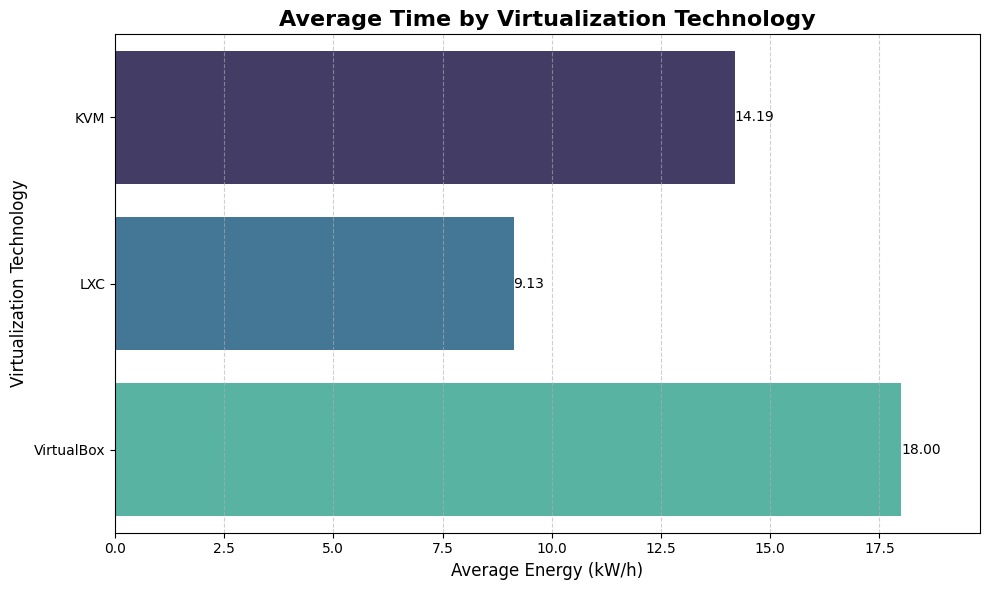

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset (replace this with your actual `df_all`)
# df_all = pd.read_csv('your_dataset.csv')


# Filter and calculate the average time for each virtualization technology
average_kvm = df_all.loc[df_all['virtualization_technology_KVM'] == 1, 'energy'].mean()
average_lxc = df_all.loc[df_all['virtualization_technology_LXC'] == 1, 'energy'].mean()
average_virtualbox = df_all.loc[df_all['virtualization_technology_VirtualBox'] == 1, 'energy'].mean()

# Create a DataFrame for visualization
averages = pd.DataFrame({
    'Technology': ['KVM', 'LXC', 'VirtualBox'],
    'Average Energy': [average_kvm, average_lxc, average_virtualbox]
})

# Print the averages
print(averages)

# Enhanced Visualization: Horizontal Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Energy', y='Technology', data=averages, palette="mako")

# Adding labels to each bar
for index, value in enumerate(averages['Average Energy']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10)

# Customize the plot
plt.title('Average Time by Virtualization Technology', fontsize=16, weight='bold')
plt.xlabel('Average Energy (kW/h)', fontsize=12)
plt.ylabel('Virtualization Technology', fontsize=12)
plt.xlim(0, averages['Average Energy'].max() * 1.1)  # Add some padding to the x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Save the figure to a file
plt.savefig('/Users/Thinkport/Documents/ba/bachelorarbeit/results/avrg_energy1.png', dpi=600, bbox_inches='tight') 

plt.tight_layout()
plt.show()

/var/folders/ns/1tbxwg412v7dvp3wyqsx8db80000gn/T/ipykernel_27032/3689248892.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  workflow_averages = df_all.groupby('workflow').apply(calculate_average_energy).reset_index(level=1, drop=True)
/usr/local/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigni

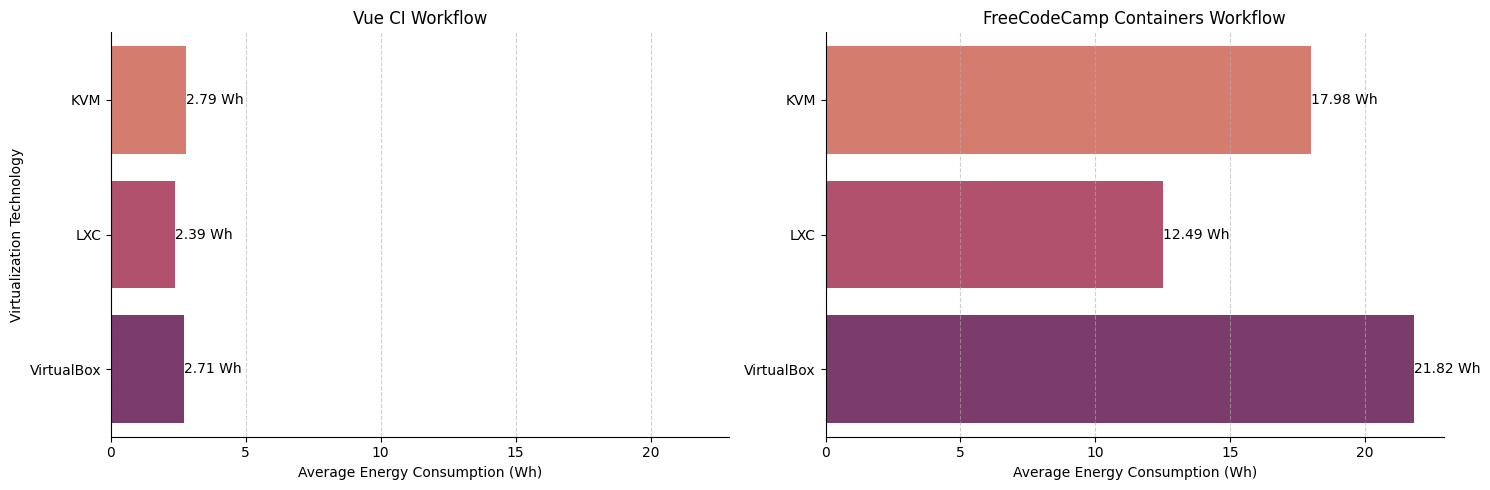

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset (replace this with your actual `df_all`)
# df_all = pd.read_csv('your_dataset.csv')

# Add a new column for energy consumption in watt-hours
df_all['energy_consumption_wh'] = (df_all['energy'])

# Define a function to calculate average energy for a given workflow
def calculate_average_energy(group):
    return pd.DataFrame({
        'Technology': ['KVM', 'LXC', 'VirtualBox'],
        'Average Energy (Wh)': [
            group.loc[group['virtualization_technology_KVM'] == 1, 'energy_consumption_wh'].mean(),
            group.loc[group['virtualization_technology_LXC'] == 1, 'energy_consumption_wh'].mean(),
            group.loc[group['virtualization_technology_VirtualBox'] == 1, 'energy_consumption_wh'].mean(),
        ]
    })

# Group by workflow and calculate averages
workflow_averages = df_all.groupby('workflow').apply(calculate_average_energy).reset_index(level=1, drop=True)

# Visualization: Facet Grid for workflows
g = sns.FacetGrid(workflow_averages.reset_index(), col='workflow', sharey=False, height=5, aspect=1.5)
g.map_dataframe(sns.barplot, x='Average Energy (Wh)', y='Technology', palette="flare", order=['KVM', 'LXC', 'VirtualBox'])

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="{:.2f} Wh", label_type="edge", fontsize=10)
# Customize the overall plot
g.set_axis_labels("Average Energy Consumption (Wh)", "Virtualization Technology")
g.fig.subplots_adjust(top=0.85)
# Customize the overall plot
g.set_axis_labels("Average Energy Consumption (Wh)", "Virtualization Technology")
g.fig.subplots_adjust(top=0.85)

# Add gridlines
for ax in g.axes.flat:
    ax.grid(axis='x', linestyle='--', alpha=0.6)
# Add gridlines
for ax in g.axes.flat:
    ax.grid(axis='x', linestyle='--', alpha=0.6)
# Iterate over axes and set custom titles
custom_titles = ["Vue CI Workflow", "FreeCodeCamp Containers Workflow"]
for ax, title in zip(g.axes.flat, custom_titles):
    ax.set_title(title)
g.set_axis_labels("Average Energy Consumption (Wh)", "Virtualization Technology")
g.fig.subplots_adjust(top=0.85)


plt.tight_layout()
plt.savefig('/Users/Thinkport/Documents/ba/bachelorarbeit/results/energy1.png', dpi=600, bbox_inches='tight') 
plt.show()


In [40]:
# Print a summary table as plain text
print("\n=== Average Energy Consumption (Wh) by Workflow ===\n")
for workflow, group in workflow_averages.groupby('workflow'):
    print(f"Workflow: {workflow}")
    print(group[['Technology', 'Average Energy (Wh)']].to_string(index=False))
    print("\n" + "-" * 50)



=== Average Energy Consumption (Wh) by Workflow ===

Workflow: ci
Technology  Average Energy (Wh)
       KVM             2.790806
       LXC             2.388467
VirtualBox             2.709939

--------------------------------------------------
Workflow: containers
Technology  Average Energy (Wh)
       KVM            17.983548
       LXC            12.494694
VirtualBox            21.823529

--------------------------------------------------
